<h1 align="center">cavapy: CORDEX-CORE Climate Data Access Simplified</h1>

<div align="center">
  <img src="https://img.shields.io/pepy/dt/cavapy?style=plastic&label=Total%20Downloads" alt="Total downloads">
  <img src="https://img.shields.io/pypi/v/cavapy?label=PyPI%20package&style=plastic" alt="PyPI version" style="display:inline-block;">
  <a href="https://www.fao.org/contact-us/data-protection-and-privacy/en/" aria-label="FAO Data Protection and Privacy policy">
    <img src="https://img.shields.io/badge/Data%20Protection%20%26%20Privacy-FAO-blue" alt="FAO Data Protection and Privacy" style="display:inline-block;">
  </a>
  <br><br>
  ⭐ If you like this project, please <a href="https://github.com/risk-team/cavapy/stargazers">give it a star on GitHub</a>!
</div>

---

**This is an interactive demonstration notebook for cavapy!** 

Run the cells below to see the package in action and explore climate data analysis capabilities.

---


## 📦 Installation

First, let's make sure cavapy is properly installed and imported:


In [1]:
# Install cavapy (uncomment if needed)
# !pip install cavapy

# Import cavapy and other necessary libraries
import cavapy

print("✅ cavapy imported successfully!")
print(f"Version info: {cavapy.__file__}")



✅ cavapy imported successfully!
Version info: /Users/riccardo/.local/share/mamba/envs/cava/lib/python3.12/site-packages/cavapy.py


## 🌍 Introduction

`cavapy` is a Python library designed to streamline the retrieval of CORDEX-CORE climate models hosted on THREDDS servers at the University of Cantabria. Using the Open-source Project for a Network Data Access Protocol (**OPeNDAP**), users can directly access and subset datasets without the need to download large NetCDF files.

### 📊 Available Datasets
- **CORDEX-CORE Simulations**: High-resolution (25 km) climate models
  - 3 Global Climate Models (GCMs)
  - 2 Regional Climate Models (RCMs) 
  - Two Representative Concentration Pathways (RCPs: RCP2.6 and RCP8.5)
- **Reanalyses Dataset**: ERA5 (for bias correction)

### 🌡️ Available Variables
- **Daily Maximum Temperature (tasmax)**: °C
- **Daily Minimum Temperature (tasmin)**: °C  
- **Daily Precipitation (pr)**: mm
- **Daily Relative Humidity (hurs)**: %
- **Daily Wind Speed (sfcWind)**: m/s
- **Daily Solar Radiation (rsds)**: W/m²


## 🚀 Example 1: Observational Data (ERA5)

Let's start by retrieving ERA5 observational data for Togo. This is a good first step to test the connection and data retrieval functionality.

**⏱️ Note**: This may take a few minutes on first run as data is downloaded.


In [2]:
# Get ERA5 observational data for Togo
print("🌍 Downloading ERA5 observational data for Togo...")
print("Variables: precipitation and maximum temperature")
print("Period: 1990-2000 (reduced for demo)")

obs_data = cavapy.get_climate_data(
    country="Togo", 
    variables=["tasmax", "pr"], 
    obs=True,  
    years_obs=range(1990, 2001)  # Using smaller range for demo
)

print("\n✅ Data downloaded successfully!")
print(f"📊 Available variables: {list(obs_data.keys())}")

# Explore the data structure
for var, data in obs_data.items():
    print(f"\n🌡️ {var.upper()}:")
    print(f"   Shape: {data.shape}")
    print(f"   Time range: {data.time.min().values} to {data.time.max().values}")
    print(f"   Spatial extent: {data.latitude.min().values:.2f}°-{data.latitude.max().values:.2f}°N, {data.longitude.min().values:.2f}°-{data.longitude.max().values:.2f}°E")
    if hasattr(data, 'units'):
        print(f"   Units: {data.units}")


2025-11-20 11:40:28,753 | climate.URL-validation-observations | 50921:8782373056 [INFO]: https://hub.ipcc.ifca.es/thredds/dodsC/fao/observations/ERA5/0.25/ERA5_025.ncml


🌍 Downloading ERA5 observational data for Togo...
Variables: precipitation and maximum temperature
Period: 1990-2000 (reduced for demo)


2025-11-20 11:40:31,017 | climate.pr-observations | 50926:13388247040 [INFO]: Establishing connection to ERA5 data for pr(tp)
2025-11-20 11:40:31,021 | climate.pr-observations | 50926:13388247040 [ERROR]: Failed to process data from None: did not find a match in any of xarray's currently installed IO backends ['netcdf4', 'scipy']. Consider explicitly selecting one of the installed engines via the ``engine`` parameter, or installing additional IO dependencies, see:
https://docs.xarray.dev/en/stable/getting-started-guide/installing.html
https://docs.xarray.dev/en/stable/user-guide/io.html
Traceback (most recent call last):
  File "/Users/riccardo/.local/share/mamba/envs/cava/lib/python3.12/site-packages/cavapy.py", line 757, in _thread_download_data
    return _download_data(url=url, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/riccardo/.local/share/mamba/envs/cava/lib/python3.12/site-packages/cavapy.py", line 779, in _download_data
    ds_var = xr.open_dataset(E

ValueError: did not find a match in any of xarray's currently installed IO backends ['netcdf4', 'scipy']. Consider explicitly selecting one of the installed engines via the ``engine`` parameter, or installing additional IO dependencies, see:
https://docs.xarray.dev/en/stable/getting-started-guide/installing.html
https://docs.xarray.dev/en/stable/user-guide/io.html

## 📊 Plotting Example 1: Spatial Maps

Let's create spatial maps of our climate data using cavapy's built-in plotting functions.


🗺️ Creating spatial maps...
✅ Spatial maps created successfully!


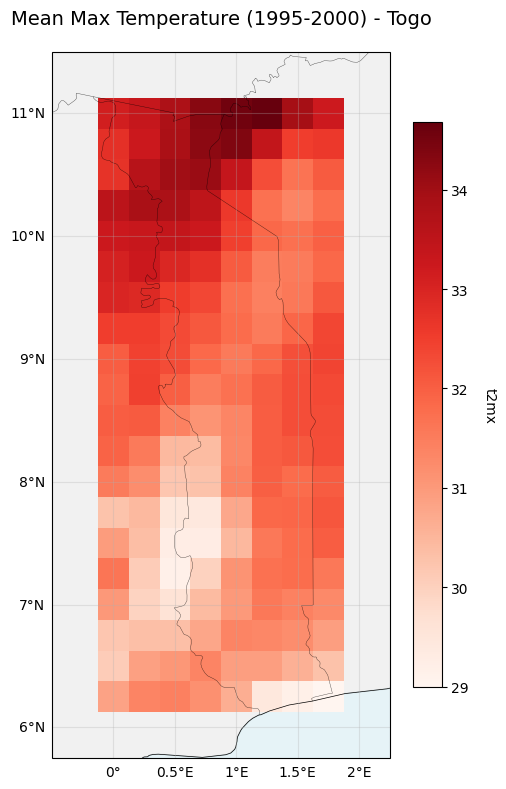

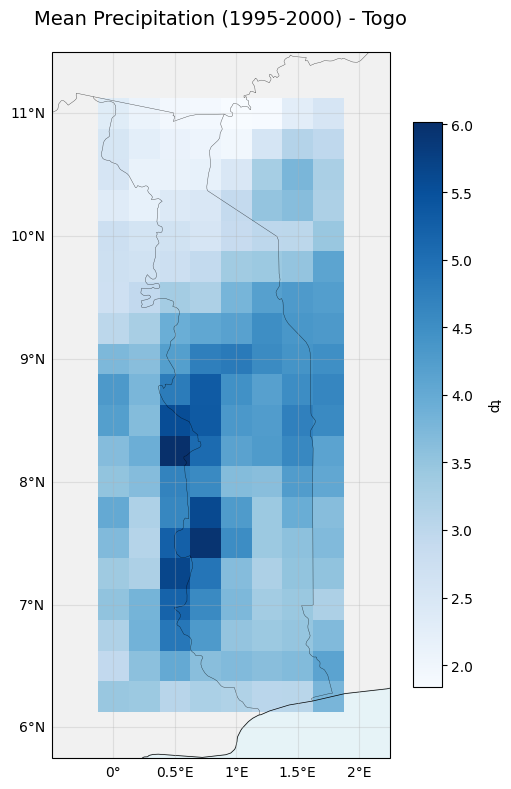

In [5]:
# Create spatial maps
print("🗺️ Creating spatial maps...")

# Plot mean maximum temperature for the 1990s
fig1 = cavapy.plot_spatial_map(
    obs_data['tasmax'], 
    time_period=(1995, 2000),
    title="Mean Max Temperature (1995-2000) - Togo",
    cmap="Reds",
    figsize=(12, 8)
)
fig1

# Plot mean precipitation for the 1990s  
fig2 = cavapy.plot_spatial_map(
    obs_data['pr'],
    time_period=(1995, 2000), 
    title="Mean Precipitation (1995-2000) - Togo",
    cmap="Blues",
    figsize=(12, 8)
)
fig2

print("✅ Spatial maps created successfully!")


## 📈 Plotting Example 2: Time Series Analysis

Now let's explore temporal patterns in our climate data.


📈 Creating time series plots...
✅ Time series plots created successfully!


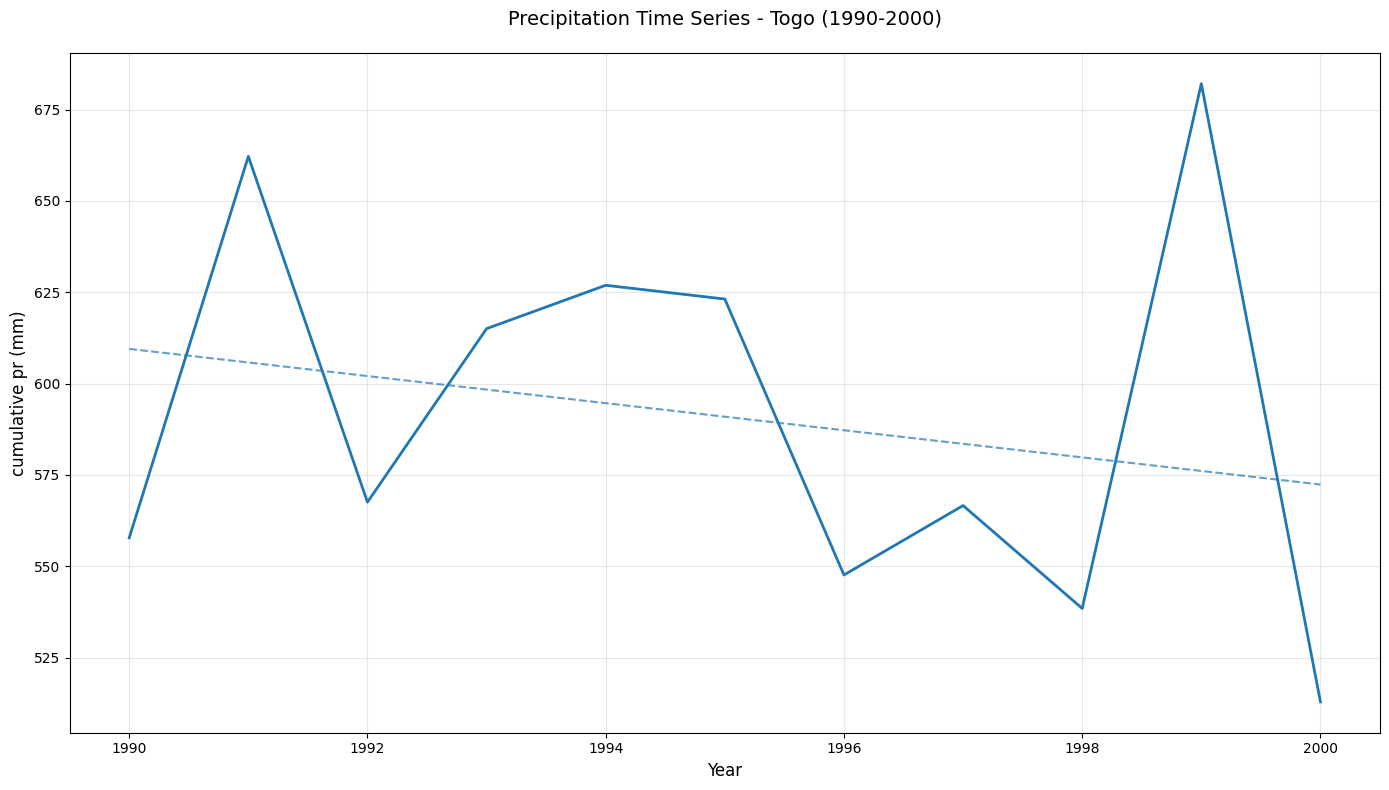

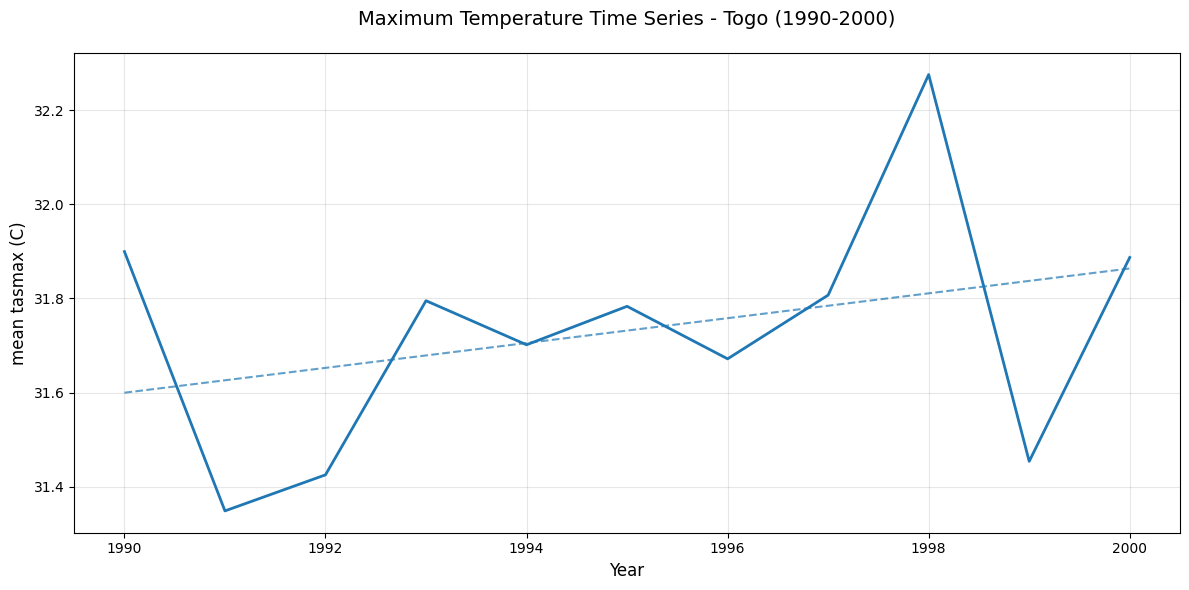

In [7]:

# Create time series plots
print("📈 Creating time series plots...")

# Plot precipitation time series with seasonal analysis
fig3 = cavapy.plot_time_series(
    obs_data['pr'],
    title="Precipitation Time Series - Togo (1990-2000)",
    trend_line=True, 
    ylabel="cumulative pr (mm)",
    aggregation="sum",
    figsize=(14, 8)
)
fig3

# Plot temperature time series
fig4 = cavapy.plot_time_series(
    obs_data['tasmax'],
    title="Maximum Temperature Time Series - Togo (1990-2000)",
    trend_line=True,    
    ylabel="mean tasmax (C)",
    figsize=(12, 6)
)
fig4

print("✅ Time series plots created successfully!")


## 🌡️ Example 2: Climate Projections

Now let's get climate projection data from CORDEX-CORE models. We'll retrieve bias-corrected projections for RCP2.6 (lower emissions scenario).


In [8]:
# Get bias-corrected climate projections
print("🔬 Downloading CORDEX-CORE climate projections...")
print("Scenario: RCP2.6 (lower emissions)")
print("Model: MPI-REMO combination")
print("Bias correction: Disabled")

proj_data_rcp26 = cavapy.get_climate_data(
    country="Togo", 
    variables=["tasmax", "pr"], 
    cordex_domain="AFR-22", 
    rcp="rcp26", 
    gcm="MPI", 
    rcm="REMO", 
    years_up_to=2030,     # Project until 2030 for demo
    obs=False,
    historical=False
)

print("\n✅ Projection data downloaded successfully!")
print(f"📊 Available variables: {list(proj_data_rcp26.keys())}")

# Explore projection data
for var, data in proj_data_rcp26.items():
    print(f"\n🌡️ {var.upper()} Projections:")
    print(f"   Shape: {data.shape}")
    print(f"   Time range: {data.time.min().values} to {data.time.max().values}")
    if hasattr(data, 'units'):
        print(f"   Units: {data.units}")


🔬 Downloading CORDEX-CORE climate projections...
Scenario: RCP2.6 (lower emissions)
Model: MPI-REMO combination
Bias correction: Enabled


2025-09-08 13:52:01,927 | climate.URL-validation-projections | 18584:15168 [INFO]: https://hub.ipcc.ifca.es/thredds/dodsC/fao/interp025/aggregations/CORDEX/output/AFR-22/GERICS/MPI-M-MPI-ESM-LR/rcp26/r1i1p1/REMO2015/v1/day/CORDEX_output_AFR-22_GERICS_MPI-M-MPI-ESM-LR_rcp26_r1i1p1_REMO2015_v1_day.ncml



✅ Projection data downloaded successfully!
📊 Available variables: ['tasmax', 'pr']

🌡️ TASMAX Projections:
   Shape: (9131, 20, 8)
   Time range: 2006-01-01T12:00:00.000000000 to 2030-12-31T12:00:00.000000000
   Units: °C

🌡️ PR Projections:
   Shape: (9131, 20, 8)
   Time range: 2006-01-01T12:00:00.000000000 to 2030-12-31T12:00:00.000000000
   Units: mm


## 🔍 Example 3: Scenario Comparison

Let's get data for RCP8.5 (higher emissions) and compare it with RCP2.6 to see the difference between climate scenarios.


In [9]:
# Get RCP8.5 data for comparison
print("🔥 Downloading RCP8.5 climate projections for comparison...")

proj_data_rcp85 = cavapy.get_climate_data(
    country="Togo", 
    variables=["tasmax", "pr"], 
    cordex_domain="AFR-22", 
    rcp="rcp85",          # Higher emissions scenario
    gcm="MPI", 
    rcm="REMO", 
    years_up_to=2030, 
    obs=False, 
    historical=False
)

print("✅ RCP8.5 data downloaded!")

# Quick comparison of basic statistics
print("\n📊 BASIC STATISTICS COMPARISON:")
print("=" * 50)

for var in ['tasmax', 'pr']:
    if var in obs_data and var in proj_data_rcp26 and var in proj_data_rcp85:
        obs_mean = obs_data[var].mean().values
        rcp26_mean = proj_data_rcp26[var].mean().values  
        rcp85_mean = proj_data_rcp85[var].mean().values
        
        print(f"\n{var.upper()}:")
        print(f"  ERA5 (1990-2000):  {obs_mean:.2f}")
        print(f"  RCP2.6 (2006-2030): {rcp26_mean:.2f}")
        print(f"  RCP8.5 (2006-2030): {rcp85_mean:.2f}")
        print(f"  RCP2.6 vs ERA5:     {rcp26_mean - obs_mean:+.2f}")
        print(f"  RCP8.5 vs ERA5:     {rcp85_mean - obs_mean:+.2f}")


🔥 Downloading RCP8.5 climate projections for comparison...


2025-09-08 13:57:54,034 | climate.URL-validation-projections | 18584:15168 [INFO]: https://hub.ipcc.ifca.es/thredds/dodsC/fao/interp025/aggregations/CORDEX/output/AFR-22/GERICS/MPI-M-MPI-ESM-LR/rcp85/r1i1p1/REMO2015/v1/day/CORDEX_output_AFR-22_GERICS_MPI-M-MPI-ESM-LR_rcp85_r1i1p1_REMO2015_v1_day.ncml


✅ RCP8.5 data downloaded!

📊 BASIC STATISTICS COMPARISON:

TASMAX:
  ERA5 (1990-2000):  31.73
  RCP2.6 (2006-2030): 33.13
  RCP8.5 (2006-2030): 33.27
  RCP2.6 vs ERA5:     +1.40
  RCP8.5 vs ERA5:     +1.54

PR:
  ERA5 (1990-2000):  3.69
  RCP2.6 (2006-2030): 4.27
  RCP8.5 (2006-2030): 4.36
  RCP2.6 vs ERA5:     +0.58
  RCP8.5 vs ERA5:     +0.67


## 🎉 NEW: ISIMIP Bias-Corrected Data

Let's try the new ISIMIP bias-corrected CORDEX-CORE dataset! This data is pre-bias-corrected using the ISIMIP methodology, so no additional bias correction is needed. Currently available for **AFR-22** (Africa) and **WAS-22** (West Asia) domains.

### Example: AFR-22 Domain


## 🌏 Example: ISIMIP Bias-Corrected Data for WAS-22 (West Asia)

Now let's try the ISIMIP bias-corrected data for the **WAS-22** domain (West Asia). This domain covers countries like Pakistan, Afghanistan, and parts of Central Asia.


In [ ]:
# Get ISIMIP bias-corrected data for WAS-22 domain
print("🌟 Downloading ISIMIP bias-corrected CORDEX-CORE data for WAS-22...")
print("Dataset: CORDEX-CORE-BC (pre-bias-corrected with ISIMIP methodology)")
print("Domain: WAS-22 (West Asia)")
print("Country: Pakistan")
print("Scenario: RCP8.5")

isimip_was22_data = cavapy.get_climate_data(
    country="Pakistan", 
    variables=["tasmax", "pr"], 
    cordex_domain="WAS-22", 
    rcp="rcp85", 
    gcm="MPI", 
    rcm="REMO", 
    years_up_to=2030,
    dataset="CORDEX-CORE-BC"  # ISIMIP bias-corrected dataset
)

print("\n✅ WAS-22 ISIMIP bias-corrected data downloaded!")
print(f"📊 Available variables: {list(isimip_was22_data.keys())}")

# Explore the data
for var, data in isimip_was22_data.items():
    print(f"\n🌡️ {var.upper()} (WAS-22):")
    print(f"   Shape: {data.shape}")
    print(f"   Time range: {data.time.min().values} to {data.time.max().values}")
    if hasattr(data, 'units'):
        print(f"   Units: {data.units}")


## 📅 Example: Historical + Projection Data with ISIMIP Bias-Correction

When you need to assess changes from the historical period, you can get both historical (1980-2005) and projection data together. With ISIMIP bias-corrected data, both periods are already bias-corrected!


In [ ]:
# Get both historical and projection data with ISIMIP bias-correction
print("📅 Downloading historical + projection data (ISIMIP bias-corrected)...")
print("Dataset: CORDEX-CORE-BC")
print("Domain: AFR-22")
print("Historical period: 1980-2005")
print("Projection period: 2006-2030 (RCP2.6)")

historical_proj_data = cavapy.get_climate_data(
    country="Togo", 
    variables=["tasmax", "pr"], 
    cordex_domain="AFR-22", 
    rcp="rcp26", 
    gcm="MPI", 
    rcm="REMO", 
    years_up_to=2030,
    historical=True,  # Include historical period
    dataset="CORDEX-CORE-BC"  # ISIMIP bias-corrected (no need for bias_correction=True)
)

print("\n✅ Historical + projection data downloaded!")
print(f"📊 Available variables: {list(historical_proj_data.keys())}")

# Explore the combined data
for var, data in historical_proj_data.items():
    print(f"\n🌡️ {var.upper()} (Historical + Projection):")
    print(f"   Shape: {data.shape}")
    print(f"   Time range: {data.time.min().values} to {data.time.max().values}")
    
    # Split into historical and projection periods
    hist_data = data.sel(time=slice("1980-01-01", "2005-12-31"))
    proj_data = data.sel(time=slice("2006-01-01", "2030-12-31"))
    
    print(f"   Historical mean (1980-2005): {hist_data.mean().values:.2f}")
    print(f"   Projection mean (2006-2030): {proj_data.mean().values:.2f}")
    print(f"   Change: {proj_data.mean().values - hist_data.mean().values:+.2f}")
    if hasattr(data, 'units'):
        print(f"   Units: {data.units}")

print("\n💡 Both historical and projection periods are already bias-corrected with ISIMIP methodology!")


In [ ]:
# Get ISIMIP bias-corrected climate projections
print("🌟 Downloading ISIMIP bias-corrected CORDEX-CORE data...")
print("Dataset: CORDEX-CORE-BC (pre-bias-corrected with ISIMIP methodology)")
print("Domain: AFR-22 (Africa)")
print("Scenario: RCP2.6")

isimip_data_rcp26 = cavapy.get_climate_data(
    country="Togo", 
    variables=["tasmax", "pr"], 
    cordex_domain="AFR-22", 
    rcp="rcp26", 
    gcm="MPI", 
    rcm="REMO", 
    years_up_to=2030,
    dataset="CORDEX-CORE-BC"  # 🎯 NEW: ISIMIP bias-corrected dataset
)

print("\n✅ ISIMIP bias-corrected data downloaded!")
print(f"📊 Available variables: {list(isimip_data_rcp26.keys())}")

# Compare with original data
print("\n📊 COMPARISON: Original vs ISIMIP Bias-Corrected Data")
print("=" * 60)

for var in ['tasmax', 'pr']:
    if var in proj_data_rcp26 and var in isimip_data_rcp26:
        original_mean = proj_data_rcp26[var].mean().values
        isimip_mean = isimip_data_rcp26[var].mean().values
        
        print(f"\n{var.upper()} (RCP2.6 2006-2030):")
        print(f"  Original CORDEX-CORE:     {original_mean:.2f}")
        print(f"  ISIMIP Bias-Corrected:    {isimip_mean:.2f}")
        print(f"  Difference (ISIMIP - Orig): {isimip_mean - original_mean:+.2f}")

print("\n💡 Note: ISIMIP bias-corrected data is ready to use without additional processing!")


## 📋 Summary: ISIMIP Bias-Corrected Data Examples

In this notebook, we've demonstrated several ways to use ISIMIP bias-corrected CORDEX-CORE data:

1. **AFR-22 Domain (Projections only)**: Example with Togo, RCP2.6
2. **WAS-22 Domain (Projections only)**: Example with Pakistan, RCP8.5  
3. **AFR-22 Domain (Historical + Projections)**: Combined dataset for change analysis

### Key Points:
- ✅ Use `dataset="CORDEX-CORE-BC"` to access ISIMIP bias-corrected data
- ✅ No need to set `bias_correction=True` (data is already corrected)
- ✅ Available for **AFR-22** and **WAS-22** domains
- ✅ Can include historical period with `historical=True`
- ❌ Cannot use `bias_correction=True` with `dataset="CORDEX-CORE-BC"` (will raise error)


## 🛡️ Smart Error Prevention

The new dataset parameter includes smart validation to prevent double bias correction:


In [ ]:
# Demonstrate error prevention: trying to apply bias correction to already bias-corrected data
print("🧪 Testing error prevention...")
print("Attempting to use bias_correction=True with dataset='CORDEX-CORE-BC'...")

try:
    # This should raise an error
    invalid_data = cavapy.get_climate_data(
        country="Togo", 
        variables=["tasmax"], 
        cordex_domain="AFR-22", 
        rcp="rcp26", 
        gcm="MPI", 
        rcm="REMO", 
        years_up_to=2030,
        dataset="CORDEX-CORE-BC",  # Already bias-corrected
        bias_correction=True       # ❌ This should cause an error
    )
    print("❌ Unexpected: No error was raised!")
    
except ValueError as e:
    print(f"✅ Correctly prevented double bias correction!")
    print(f"📝 Error message: {e}")

print("\n💡 This prevents users from accidentally applying bias correction to already corrected data!")


## Figures used for the README file

In [ ]:

import matplotlib.pyplot as plt
import os

data = cavapy.get_climate_data(country="Togo", obs=True, years_obs=range(1990, 2011))

print("🎨 Saving figures for README...")

# Configure matplotlib for high-quality figures
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'

# 1. Save spatial temperature map
print("🗺️ Saving spatial temperature map...")
fig_temp = cavapy.plot_spatial_map(
    data['tasmax'], 
    time_period=(1990, 2000),
    title="Mean Maximum Temperature (1990-2000) - Togo",
    cmap="Reds",
    figsize=(8, 4)
)
fig_temp.savefig('../figures/spatial_map_temperature.png', dpi=300, bbox_inches='tight')
plt.close(fig_temp)
print("✅ Saved: figures/spatial_map_temperature.png")

# 2. Save precipitation time series
print("📈 Saving precipitation time series...")
fig_precip = cavapy.plot_time_series(
    data['pr'],
    title="Precipitation Time Series - Togo (1990-2011)",
    trend_line=True,
    ylabel="Annual Precipitation (mm)",
    aggregation="sum",
    figsize=(12, 6)
)
fig_precip.savefig('../figures/time_series_precipitation.png', dpi=300, bbox_inches='tight')
plt.close(fig_precip)
print("✅ Saved: figures/time_series_precipitation.png")




2025-09-08 15:21:59,454 | climate.URL-validation-observations | 18584:15168 [INFO]: https://hub.ipcc.ifca.es/thredds/dodsC/fao/observations/ERA5/0.25/ERA5_025.ncml
